#GRIPJUNE23
#TASK-06:Prediction using  Decision Tree Algorithm
## Author: Naimur Asif Borno

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [4]:
#importing the data
data=pd.read_csv("/content/Iris.csv")

In [5]:
#displaying the data
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 6)

In [7]:
#statistical measure of the dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#dropping the Id columns
data=data.drop(columns=['Id'])

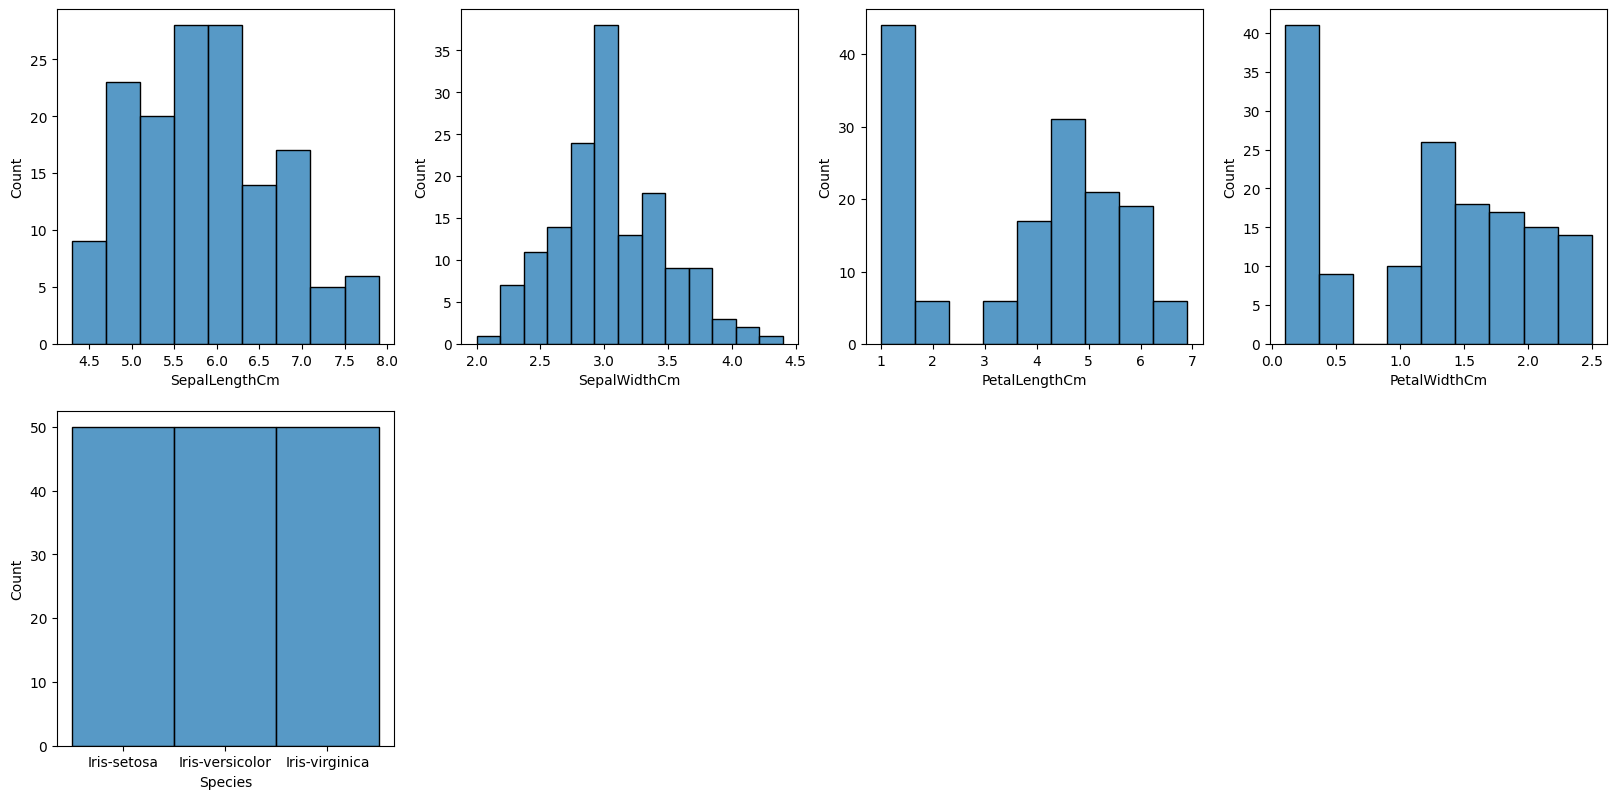

In [9]:
#plotting the distribution of the data
plt.figure(figsize=(20,20))
for i,columns in enumerate(data):
  plt.subplot(4,4,i+1)
  sns.histplot(data=data,x=data[columns])

In [10]:
#converting the categorical values in to numerical values
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Species']=encoder.fit_transform(data['Species'])
map=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
map

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [11]:
#Creating the model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=1234)

In [12]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X=data.drop(columns=['Species'])
y=data['Species']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [13]:
#Fitting the model
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1234)

[Text(0.4, 0.9166666666666666, 'PetalLengthCm <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [42, 39, 39]\nclass = S'),
 Text(0.2, 0.75, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = S'),
 Text(0.6, 0.75, 'PetalWidthCm <= 1.7\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]\nclass = p'),
 Text(0.4, 0.5833333333333334, 'PetalLengthCm <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = p'),
 Text(0.2, 0.4166666666666667, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = p'),
 Text(0.6, 0.4166666666666667, 'SepalLengthCm <= 6.15\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = e'),
 Text(0.4, 0.25, 'PetalWidthCm <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = p'),
 Text(0.2, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = e'),
 Text(0.6, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = p'),
 Text(0.8, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = e'),
 Text(0.8, 0.5833333333333334, '

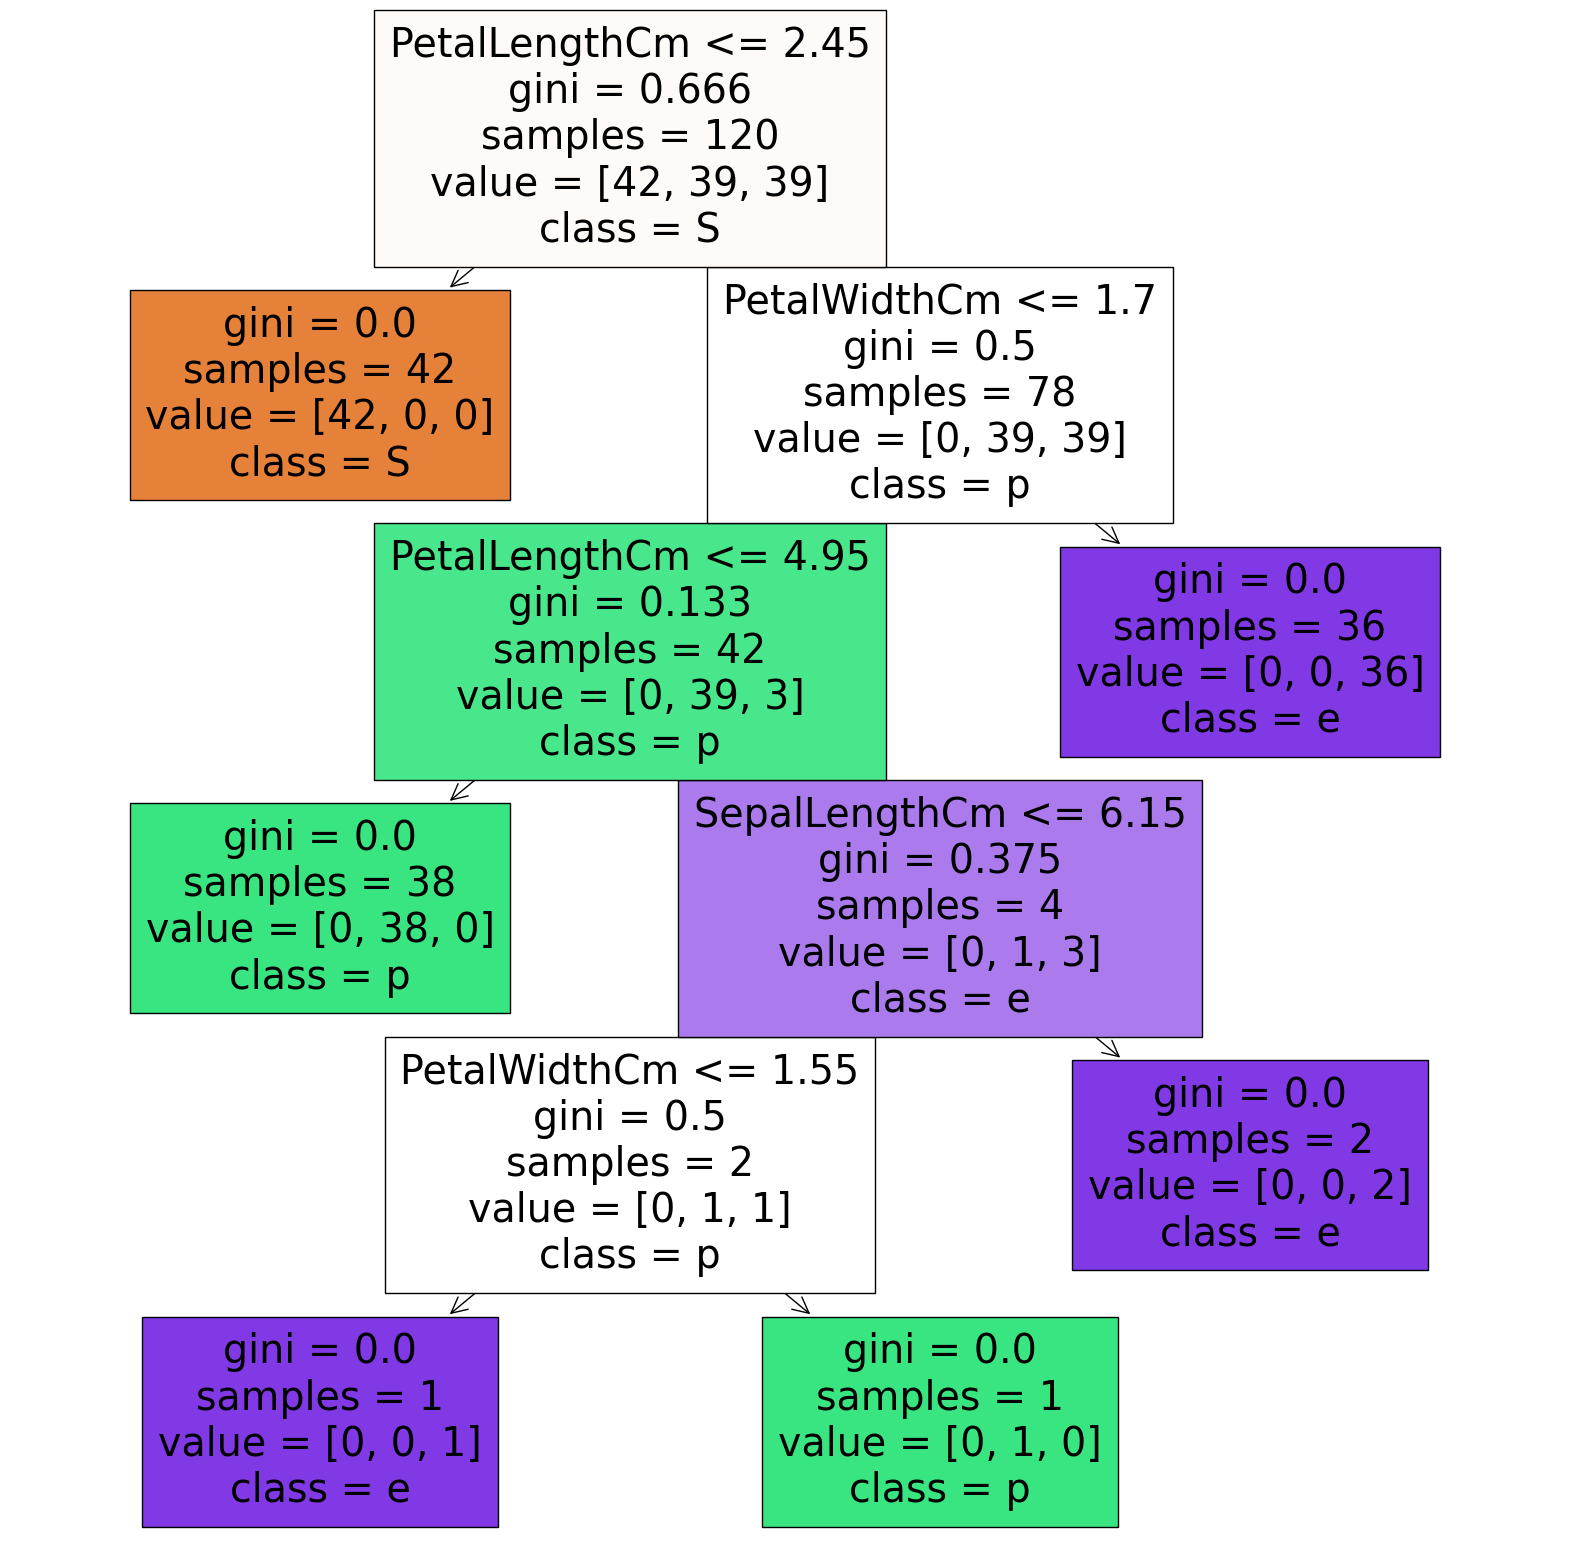

In [14]:
#Plotting the decision tree classifier model
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(model,feature_names=X.columns,class_names='Species',filled=True)

In [15]:
#Printing the testing accuracy
model.score(X_test,y_test)

0.9333333333333333

The Accuracy of the model is 93.335%

In [16]:
dic={0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}

In [17]:
#testing the model with new data
X_new=[[70,3.30,5.00,1.5]]
X_new=pd.DataFrame(X_new,columns=X_train.columns)
prediction=model.predict(X_new)
print(dic[prediction[0]])

Iris-virginica
